# Contour Approximation

Contour approximation is a process of reducing the number of points making up a contour. In the following example cv2.approxPolyDP function is used to identify the rectangles from the image. This function is based on the Ramer-Douglas-Peucker algorithm

The logic here being, if we approximate a contour to have just 4 points, we can assume that its a rectangle or a square. 

One parameter that governs how well the approximation matches the original contour is the $\epsilon$ parameter. The larger the $\epsilon$ value is, the more points will be discarded. Similarly, the smaller the $\epsilon$ value is, the more points will be kept.

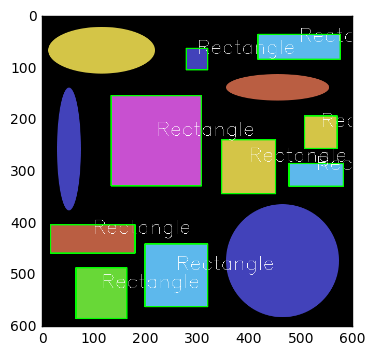

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image/contours_circles_and_squares.png')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

cnts = cv2.findContours(gray.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

clone = image.copy()
for i,c in enumerate(cnts[1]):
    peri = cv2.arcLength(c,True)
    # approximate the curve to 1% of the initial curve
    approx = cv2.approxPolyDP(c, 0.01*peri, True)
    
    #filter curves with 4 points
    if len(approx) == 4:
        M = cv2.moments(c)
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        cv2.putText(clone,"Rectangle",(cX,cY-10),cv2.FONT_HERSHEY_SIMPLEX,
                1.25, (255, 255, 255), 1)
        cv2.drawContours(clone,[c],-1,(0,255,0),2)

plt.imshow(clone)
plt.show()

17


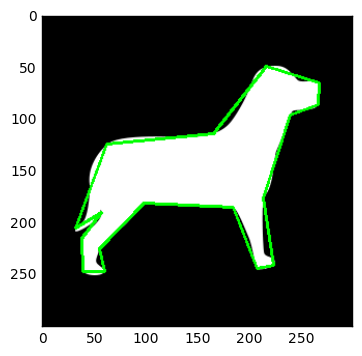

In [13]:
image = cv2.imread('image/dog_contour.png')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

cnts = cv2.findContours(gray.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

clone = image.copy()
peri = cv2.arcLength(cnts[1][0],True)
# approximate the curve to 1% of the initial curve
approx = cv2.approxPolyDP(cnts[1][0], 0.01*peri, True)
    
cv2.drawContours(clone,[approx],-1,(0,255,0),2)
print(len(approx))

plt.imshow(clone)
plt.show()

## Effect of epsilon

3


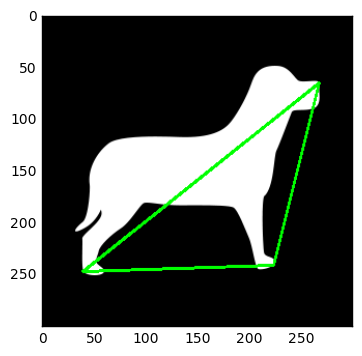

In [16]:
image = cv2.imread('image/dog_contour.png')

gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

cnts = cv2.findContours(gray.copy(),cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

clone = image.copy()
peri = cv2.arcLength(cnts[1][0],True)
# approximate the curve to 1% of the initial curve
# epsilon set to 10%
approx = cv2.approxPolyDP(cnts[1][0], 0.1*peri, True)
    
cv2.drawContours(clone,[approx],-1,(0,255,0),2)
print(len(approx))

plt.imshow(clone)
plt.show()